# Webinar 4: Tidy Data, Cleaning Data, Distributions, Thinking Probabilistically

## Data cleaning takes 60-80% of data science.

### What is tidy data?

https://vita.had.co.nz/papers/tidy-data.pdf

We're going to study the Quaterly External Debt Statistics from the World Bank. https://datacatalog.worldbank.org/dataset/quarterly-external-debt-statistics-sdds

In [1]:
import pandas as pd
sdds = pd.read_csv("data/SDDSData.csv")

In [2]:
sdds.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,Unnamed: 90
0,Afghanistan,AFG,"Ext. Assets in Debt Instruments, All Sectors, ...",DT.DOD.DECT.CD.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DECT.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLXF.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLCD.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLBN.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Is each row a separate record?
- How will the data be used?
- Will you eventyally migrate the data into a relational database?

In [3]:
pd.melt?

Signature:
pd.melt(
    frame: 'DataFrame',
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level=None,
    ignore_index: bool = True,
) -> 'DataFrame'
Docstring:
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default 'value'
    Na

In [4]:
sdds_tidy = pd.melt(sdds, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="date", value_name="quaterly_debt")
sdds_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,date,quaterly_debt
0,Afghanistan,AFG,"Ext. Assets in Debt Instruments, All Sectors, ...",DT.DOD.DECT.CD.AR.EA.US,1998Q1,NaN
1,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DECT.CD.MA.AR.EA.US,1998Q1,NaN
2,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLXF.CD.MA.AR.EA.US,1998Q1,NaN
3,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLCD.CD.MA.AR.EA.US,1998Q1,NaN
4,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLBN.CD.MA.AR.EA.US,1998Q1,NaN


## Cleaning data

- Glimpse the first rows
- Does it have an index?
- Is there an existing index that's currently saved as a column? 

In [5]:
sdds_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18792000 entries, 0 to 18791999
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country Name    object 
 1   Country Code    object 
 2   Indicator Name  object 
 3   Indicator Code  object 
 4   date            object 
 5   quaterly_debt   float64
dtypes: float64(1), object(5)
memory usage: 860.2+ MB


In [6]:
sdds_tidy.index

RangeIndex(start=0, stop=18792000, step=1)

### What's missing?

- Where is it missing? Why?
- How to deal with that?
- How do you decide to drop information?

In [7]:
sdds_tidy.quaterly_debt.isna().groupby(sdds_tidy["date"]).mean()

date
1998Q1         0.996968
1998Q2         0.996968
1998Q3         0.996968
1998Q4         0.996218
1999Q1         0.995551
                 ...   
2018Q3         0.871870
2018Q4         0.870912
2019Q1         0.874218
2019Q2         0.903694
Unnamed: 90    1.000000
Name: quaterly_debt, Length: 87, dtype: float64

In [10]:
sdds_tidy = sdds_tidy.dropna(axis = "rows") #drop rows that contain a NaN/null value

In [11]:
sdds_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,date,quaterly_debt
18902,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.AR.US,1998Q1,1.725000e+08
18912,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.CD.AR.US,1998Q1,2.448400e+09
18915,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.DS.US,1998Q1,0.000000e+00
18919,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Long-term, ...",DT.DOD.DLXF.CD.US,1998Q1,1.024000e+09
18928,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Short-term,...",DT.DOD.DSTC.CD.US,1998Q1,1.424400e+09


In [11]:
sdds_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229494 entries, 18902 to 18572399
Data columns (total 6 columns):
Country Name      1229494 non-null object
Country Code      1229494 non-null object
Indicator Name    1229494 non-null object
Indicator Code    1229494 non-null object
date              1229494 non-null object
quaterly_debt     1229494 non-null float64
dtypes: float64(1), object(5)
memory usage: 65.7+ MB


## What are the data types?

In [12]:
sdds_tidy.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
date               object
quaterly_debt     float64
dtype: object

In [12]:
sdds_tidy[["year", "quarter"]] = sdds_tidy["date"].str.split("Q", n=1, expand=True)
sdds_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,date,quaterly_debt,year,quarter
18902,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.AR.US,1998Q1,1.725000e+08,1998,1
18912,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.CD.AR.US,1998Q1,2.448400e+09,1998,1
18915,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.DS.US,1998Q1,0.000000e+00,1998,1
18919,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Long-term, ...",DT.DOD.DLXF.CD.US,1998Q1,1.024000e+09,1998,1
18928,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Short-term,...",DT.DOD.DSTC.CD.US,1998Q1,1.424400e+09,1998,1


In [13]:
# Counts
sdds_tidy.groupby(["year","quarter"]).count()

Country Name  Country Code  Indicator Name  Indicator Code  \
year quarter                                                               
1998 1                 655           655             655             655   
     2                 655           655             655             655   
     3                 655           655             655             655   
     4                 817           817             817             817   
1999 1                 961           961             961             961   
...                    ...           ...             ...             ...   
2018 2               28047         28047           28047           28047   
     3               27676         27676           27676           27676   
     4               27883         27883           27883           27883   
2019 1               27169         27169           27169           27169   
     2               20802         20802           20802           20802   

               date  quaterly_debt  
year quarter                        
1998 1          655            655  
     2          655            655  
     3          655            655  
     4          817            817  
1999 1          961            961  
...             ...            ...  
2018 2        28047          28047  
     3        27676          27676  
     4        27883          27883  
2019 1        27169          27169  
     2        20802          20802  

[86 rows x 6 columns]

In [14]:
sdds_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,date,quaterly_debt,year,quarter
18902,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.AR.US,1998Q1,1.725000e+08,1998,1
18912,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.CD.AR.US,1998Q1,2.448400e+09,1998,1
18915,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.DS.US,1998Q1,0.000000e+00,1998,1
18919,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Long-term, ...",DT.DOD.DLXF.CD.US,1998Q1,1.024000e+09,1998,1
18928,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Short-term,...",DT.DOD.DSTC.CD.US,1998Q1,1.424400e+09,1998,1


In [17]:
sdds.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1998Q1,1998Q2,1998Q3,1998Q4,1999Q1,1999Q2,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,Unnamed: 90
0,Afghanistan,AFG,"Ext. Assets in Debt Instruments, All Sectors, ...",DT.DOD.DECT.CD.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DECT.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLXF.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLCD.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,"Ext. Assets in Debt Instruments, Central Bank,...",DT.DOD.DLBN.CD.MA.AR.EA.US,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sdds_tidy = sdds_tidy.drop("date", axis="columns")

In [16]:
sdds_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,quaterly_debt,year,quarter
18902,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.AR.US,1.725000e+08,1998,1
18912,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.CD.AR.US,2.448400e+09,1998,1
18915,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, All maturit...",DT.DOD.DECT.DS.US,0.000000e+00,1998,1
18919,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Long-term, ...",DT.DOD.DLXF.CD.US,1.024000e+09,1998,1
18928,Belarus,BLR,"Gross Ext. Debt Pos., All Sectors, Short-term,...",DT.DOD.DSTC.CD.US,1.424400e+09,1998,1


Resource: Introduction to Relational Databases -- Turn a giant Spreadsheet into a Relational SQL database.

# Distributions and Thinking Probabilistically

What distributions are the most important within data science? Why?

## Normal distribution

The standard normal distribution is the one with mean 0 and std 1.

In [18]:
import numpy as np
ndist50 = np.random.normal(0,1,50)
ndist500 = np.random.normal(0,1,500)
ndist5000 = np.random.normal(0,1,5000)

In [19]:
ndist50

array([ 1.02156297,  1.22611661,  0.34111576, -0.27852643, -1.06063736,
       -0.37430042, -0.18346957,  0.66594347, -0.32673461, -0.39312364,
        0.34823548, -0.13239421, -0.28716717, -0.62563275, -1.39361611,
       -0.04164757,  0.96009535, -0.2764572 , -1.31598119,  0.07151407,
        0.35727347, -0.5263405 ,  1.80271862,  0.55668599,  0.14268468,
       -1.33493597,  0.66049895, -0.55698063, -0.91563286,  1.56373235,
       -1.16531693,  0.95100309, -1.54691178,  0.18554306,  0.82813691,
       -0.23801485,  0.52825682,  0.97379805,  1.63745841, -0.76635424,
       -1.67249413,  0.43521907,  0.50808893,  0.05746312, -0.15502408,
        0.779929  , -1.01864668, -0.10380122,  0.31115306,  1.47253254])

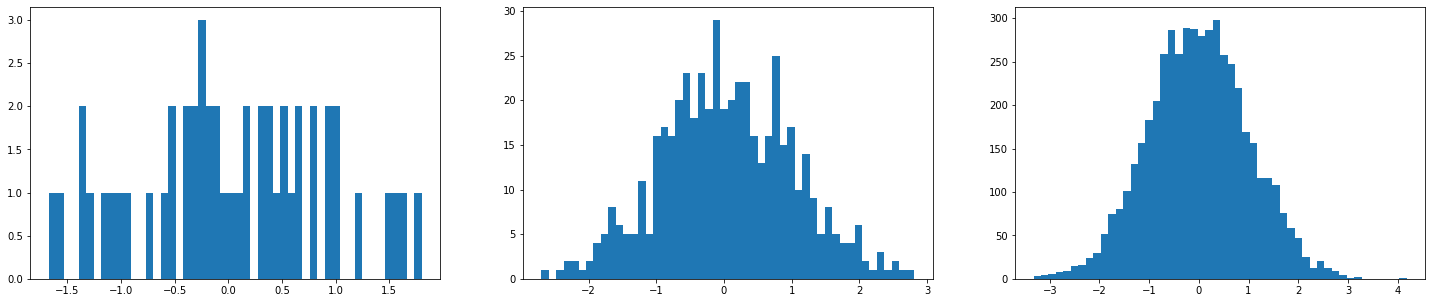

In [20]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (25,5)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=False)

ax1.hist(ndist50, bins=50)
ax2.hist(ndist500, bins=50)
ax3.hist(ndist5000, bins=50)
plt.show()

## Bernoulli distribution

In [21]:
from scipy import stats

In [22]:
stats.binom.mean(6, 0.5)

3.0

In [23]:
stats.binom.std(6, 0.5)

1.224744871391589

## Poisson Distributions

$$ P(x, \lambda) = (e^{-\lambda})(\lambda^x) / x! $$

In [25]:
from scipy.stats import poisson

In [26]:
n = np.arange(0,10)
rate= 2

In [27]:
p = poisson.pmf(n, rate)

In [28]:
p

array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04])

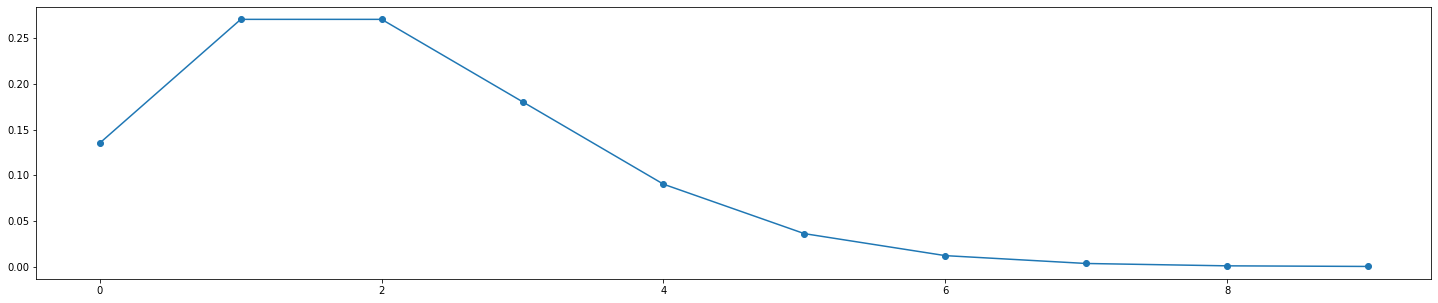

In [29]:
plt.plot(n, p, "-o")

## Understanding Uncertainty

https://serc.carleton.edu/sp/library/uncertainty/what.html

http://ai.stanford.edu/~paskin/gm-short-course/lec1.pdf

https://medium.com/@ismailalimanik/learn-to-think-probabilistically-to-improve-decision-making-76f7d2dab428